In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import datetime

import requests
from config import api_key
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
from pprint import pprint

In [2]:
# csv file paths
amazon_daily_path = "Resources/amazon_daily_stock.csv"
target_daily_path = "Resources/target_daily_stock.csv"
covid_path = "Resources/covid_testing.csv"

In [3]:
#read file paths
amazon_daily = pd.read_csv(amazon_daily_path)
target_daily = pd.read_csv(target_daily_path)
covid_daily = pd.read_csv(covid_path)

In [4]:
#merge target and amazon dataset
amzn_tgt_df = pd.merge(amazon_daily, target_daily ,how='outer', on='date', suffixes = ('_Amazon', '_Target'))

In [5]:
amzn_tgt_df.head()

,date,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Adj Close_Amazon,Volume_Amazon,Open_Target,High_Target,Low_Target,Close_Target,Adj Close_Target,Volume_Target
0,1/27/2020,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500.0,112.949997,116.209999,112.570000,115.779999,113.485497,6779200
1,1/28/2020,1840.500000,1858.109985,1830.020020,1853.250000,1853.250000,2808000.0,116.150002,116.459999,115.430000,115.440002,113.152229,3865100
2,1/29/2020,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000.0,115.779999,116.080002,114.250000,114.269997,112.005417,5250600
3,1/30/2020,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400.0,113.769997,114.709999,112.889999,114.669998,112.397491,4466400
4,1/31/2020,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300.0,113.410004,113.790001,110.370003,110.739998,108.545372,6961900


In [6]:
#create death increase per positivty increase 
covid_daily['death_per_positive']= covid_daily['deathIncrease']/ covid_daily['positiveIncrease']

In [7]:
covid_daily['ventilator_%']= covid_daily['onVentilatorCurrently']/ covid_daily['hospitalizedCurrently']

In [8]:
covid_daily.head()

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,negativeIncrease,onVentilatorCumulative,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,death_per_positive,ventilator_%
0,2021-01-22,404695.0,3980,40687.0,22008.0,4325,116264.0,776384.0,221900013.0,1375093,3919.0,7236.0,24483676.0,188983,56,291407518,1988756,0.021060,0.062238
1,2021-01-21,400715.0,3878,40481.0,22309.0,4053,119949.0,772059.0,220524920.0,1263704,3910.0,7370.0,24294693.0,184033,56,289418762,1899019,0.021072,0.061443
2,2021-01-20,396837.0,4409,40340.0,22809.0,5105,122700.0,768006.0,219261216.0,1283431,3897.0,7564.0,24110660.0,186722,56,287519743,1788698,0.023613,0.061646
3,2021-01-19,392428.0,2141,40103.0,23029.0,3206,123820.0,762901.0,217977785.0,1301789,3883.0,7688.0,23923938.0,144047,56,285731045,1698121,0.014863,0.062090
4,2021-01-18,390287.0,1395,39973.0,23226.0,2839,123848.0,759695.0,216675996.0,1679248,3865.0,7772.0,23779891.0,150220,56,284032924,2088685,0.009286,0.062754


In [9]:
covid_daily['new_datetime'] = pd.to_datetime(covid_daily['date'])

In [10]:
covid_daily['Month_year']= covid_daily['new_datetime'].dt.strftime('%Y-%m')

In [11]:
covid_month_groupby = covid_daily.groupby('Month_year')

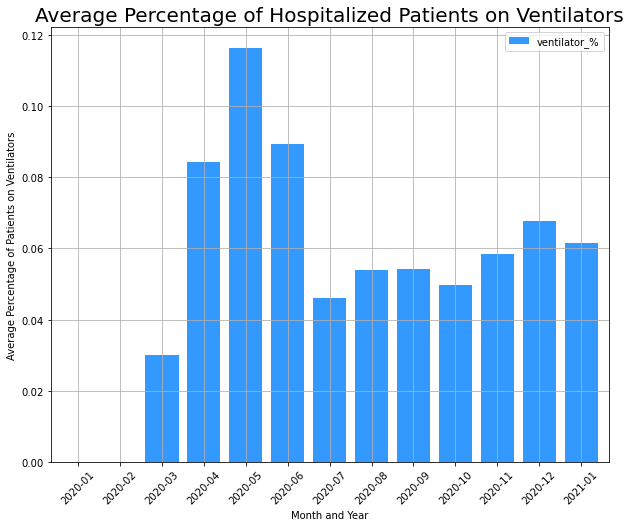

In [101]:
vent_bar = covid_month_groupby['ventilator_%'].mean().plot.bar(width=.8, color= '#3399FF', figsize=(10,8), grid = True, legend = True)

vent_bar.set_title("Average Percentage of Hospitalized Patients on Ventilators", size = 20)
vent_bar.set_xlabel("Month and Year")
vent_bar.set_ylabel("Average Percentage of Patients on Ventilators")

plt.xticks(rotation=45)


plt.savefig("../Stock Comparisons/Images/AvgVentBar.png")

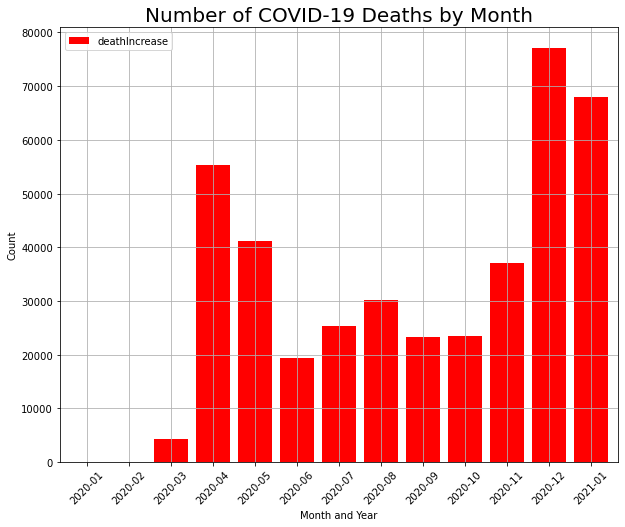

In [102]:
death_bar = covid_month_groupby['deathIncrease'].sum().plot.bar(width=.8 , color= '#FF0000', figsize=(10,8), grid = True, legend = True)

death_bar.set_title("Number of COVID-19 Deaths by Month",  size = 20)
death_bar.set_xlabel("Month and Year")
death_bar.set_ylabel("Count")

plt.xticks(rotation=45)

plt.savefig("../Stock Comparisons/Images/DeathIncrByMonth.png")

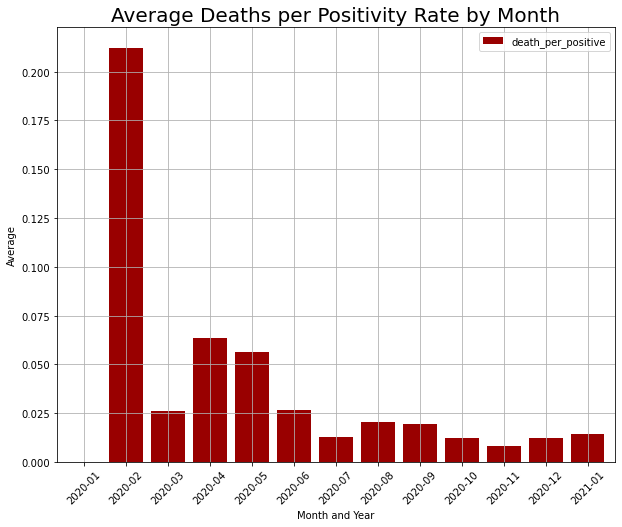

In [103]:
death_pos_bar = covid_month_groupby['death_per_positive'].mean().plot.bar(width=.8, color= '#990000', figsize=(10,8), grid = True, legend = True)

death_pos_bar.set_title("Average Deaths per Positivity Rate by Month", size = 20)
death_pos_bar.set_xlabel("Month and Year")
death_pos_bar.set_ylabel("Average")

plt.xticks(rotation=45)

plt.savefig("../Stock Comparisons/Images/DeathPerPosByMonth.png")

In [90]:
#merge stock and covid dataset on date
stock_covid_merge = pd.merge(amzn_tgt_df, covid_daily ,how='outer', on="date")

In [91]:
#convert date column into datetime format for grouping

stock_covid_merge['new_datetime'] = pd.to_datetime(stock_covid_merge['date'])

In [92]:
stock_covid_merge.head()

,date,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Adj Close_Amazon,Volume_Amazon,Open_Target,High_Target,Low_Target,...,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,death_per_positive,ventilator_%,new_datetime,Month_year
0,1/27/2020,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500.0,112.949997,116.209999,112.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-27,NaN
1,1/28/2020,1840.500000,1858.109985,1830.020020,1853.250000,1853.250000,2808000.0,116.150002,116.459999,115.430000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-28,NaN
2,1/29/2020,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000.0,115.779999,116.080002,114.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29,NaN
3,1/30/2020,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400.0,113.769997,114.709999,112.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-30,NaN
4,1/31/2020,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300.0,113.410004,113.790001,110.370003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31,NaN


In [93]:
#create new Month_year data for grouping monthly data
stock_covid_merge['Month_year']= stock_covid_merge['new_datetime'].dt.strftime('%Y-%m')

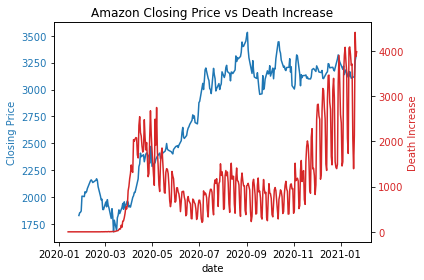

In [104]:
#Create graph to compare trend between death increase and Amazon Closing Price
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(stock_covid_merge['new_datetime'],stock_covid_merge['Close_Amazon'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Death Increase', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_covid_merge['new_datetime'],stock_covid_merge['deathIncrease'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Amazon Closing Price vs Death Increase')
plt.legend

fig.tight_layout()  
plt.show()



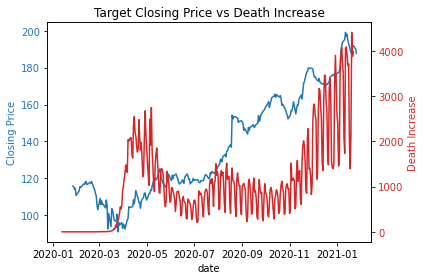

<Figure size 432x288 with 0 Axes>

In [95]:
#Create graph to compare trend between death increase and Amazon Closing Price
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('date')
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(stock_covid_merge['new_datetime'],stock_covid_merge['Close_Target'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Death Increase', color=color)  # we already handled the x-label with ax1
ax2.plot(stock_covid_merge['new_datetime'],stock_covid_merge['deathIncrease'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Target Closing Price vs Death Increase')
plt.legend

fig.tight_layout()  
plt.show()



In [96]:
#groupby month_year for merged data
month_groupby = stock_covid_merge.groupby('Month_year')

In [21]:
month_groupby.head()

,date,Open_Amazon,High_Amazon,Low_Amazon,Close_Amazon,Adj Close_Amazon,Volume_Amazon,Open_Target,High_Target,Low_Target,...,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,death_per_positive,ventilator_%,new_datetime,Month_year
0,1/27/2020,1820.000000,1841.000000,1815.339966,1828.339966,1828.339966,3528500.0,112.949997,116.209999,112.570000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-27,2020-01
1,1/28/2020,1840.500000,1858.109985,1830.020020,1853.250000,1853.250000,2808000.0,116.150002,116.459999,115.430000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-28,2020-01
2,1/29/2020,1864.000000,1874.750000,1855.020020,1858.000000,1858.000000,2088000.0,115.779999,116.080002,114.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-29,2020-01
3,1/30/2020,1858.000000,1872.869995,1850.609985,1870.680054,1870.680054,6327400.0,113.769997,114.709999,112.889999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-30,2020-01
4,1/31/2020,2051.469971,2055.719971,2002.270020,2008.719971,2008.719971,15567300.0,113.410004,113.790001,110.370003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-31,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,1/4/2021,3270.000000,3272.000000,3144.020020,3186.629883,3186.629883,4411400.0,176.509995,178.089996,174.119995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-04,2021-01
238,1/5/2021,3166.010010,3223.379883,3165.060059,3218.510010,3218.510010,2655500.0,176.800003,181.970001,176.429993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-05,2021-01
239,1/6/2021,3146.479980,3197.510010,3131.159912,3138.379883,3138.379883,4394800.0,180.330002,189.470001,180.110001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-06,2021-01
240,1/7/2021,3157.000000,3208.540039,3155.000000,3162.159912,3162.159912,3514500.0,189.210007,192.350006,189.169998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-01-07,2021-01


In [60]:
#API query
query_1 = "Target Stock Strategy"

begin_date_1 = "20200401"
end_date_1 = "20210130"

query_url_1 = f"{url}api-key={api_key}&q={query_1}&begin_date={begin_date_1}&end_date={end_date_1}"

In [111]:
articles_1 = requests.get(query_url).json()
articles_list_1 = articles_1["response"]["docs"]

In [105]:
print("Possible Reasons for Target Stock Recovery")
for article in articles_list_1:
    print(article["web_url"])

Possible Reasons for Target Stock Recovery
https://www.nytimes.com/2020/12/07/us/politics/georgia-senate-debate-warnock-loeffler.html
https://www.nytimes.com/2020/08/19/opinion/trump-usps-mail-voting.html
https://www.nytimes.com/2020/05/29/your-money/college-529-plan-coronavirus.html
https://www.nytimes.com/2020/06/08/briefing/george-floyd-defunding-stock-rally.html
https://www.nytimes.com/2020/12/18/business/stock-market-forecasts-wall-street.html
https://www.nytimes.com/2020/04/03/business/stock-market-coronavirus-strategy.html
https://www.nytimes.com/2020/07/14/business/economy/corporate-diversity-pay-compensation.html
https://www.nytimes.com/2020/12/19/business/dealbook/deals-mergers-acquisitions-2020.html
https://www.nytimes.com/2020/10/09/business/retailers-curbside-pickup.html
https://www.nytimes.com/2021/01/27/business/dealbook/reddit-wallstreetbets-gamestop.html


In [108]:
query_2 = "Ventilator"

begin_date_2 = "20200301"
end_date_2 = "20210130"

query_url_2 = f"{url}api-key={api_key}&q={query_2}&begin_date={begin_date_2}&end_date={end_date_2}"

In [110]:
articles_2 = requests.get(query_url_2).json()
articles_list_2 = articles_2["response"]["docs"]


print("Possible Reasons for Ventilators Increase")
for article in articles_list_2:
    print(article["web_url"])

Possible Reasons for Ventilators Increase
https://www.nytimes.com/2020/12/26/world/africa/africa-coronavirus-pandemic.html
https://www.nytimes.com/2020/12/17/nyregion/new-york-ppe-refunds.html
https://www.nytimes.com/2020/11/22/health/Covid-ventilators-stockpile.html
https://www.nytimes.com/2020/10/18/health/Covid-lung-damage-recovery.html
https://www.nytimes.com/2020/10/08/well/live/covid-19-hospital-rehabilitation.html
https://www.nytimes.com/2020/09/13/us/politics/usaid-coronavirus-trump.html
https://www.nytimes.com/2020/08/28/world/asia/india-coronavirus.html
https://www.nytimes.com/2020/08/27/business/turkey-currency-crisis.html
https://www.nytimes.com/2020/08/26/opinion/coronavirus-military-medics.html
https://www.nytimes.com/video/opinion/100000007074156/coronavirus-ventilator-rationing.html
